In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('/Users/kathiateran/Documents/ionosphere.csv')
dataset

,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,...,a26,a27,a28,a29,a30,a31,a32,a33,a34,class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [4]:
X = dataset.iloc[:, 0:33].values
y = dataset.iloc[:, 34].values

In [5]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

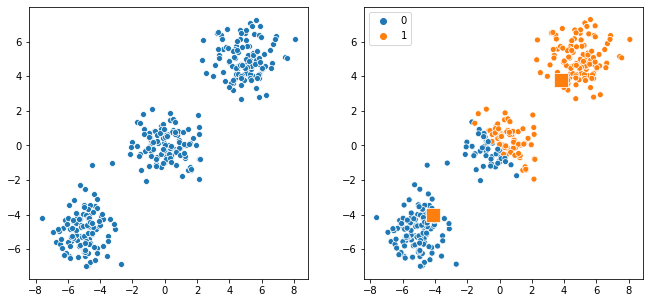

In [6]:
from fcmeans import FCM
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from seaborn import scatterplot as scatter

n_samples = 351
n_bins = 2  # use 2 bins for calibration_curve as we have 2 clusters 
centers = [(-5, -5), (0, 0), (5, 5)]

X,_ = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42) 

# fit the fuzzy-c-means
fcm = FCM(n_clusters=2)
fcm.fit(X)

# outputs
fcm_centers = fcm.centers
fcm_labels  = fcm.u.argmax(axis=1)

# plot result
#%matplotlib inline
f, axes = plt.subplots(1, 2, figsize=(11,5))
scatter(X[:,0], X[:,1], ax=axes[0])
scatter(X[:,0], X[:,1], ax=axes[1], hue=fcm_labels)
scatter(fcm_centers[:,0], fcm_centers[:,1], ax=axes[1],marker="s",s=200)
plt.show()

In [7]:
# Splitting the dataset:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

pred_train_fcm = fcm.predict(X_train)
pred_test_fcm = fcm.predict(X_test)

from sklearn import metrics

print('\nPrediction accuracy for the training dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_train, pred_train_fcm)))

print('Prediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_fcm)))

print('Confusion Matrix')
print(metrics.confusion_matrix(y_test, fcm.predict(X_test)))


Prediction accuracy for the training dataset
67.62%

Prediction accuracy for the test dataset
62.60%

Confusion Matrix
[[58 32]
 [60 96]]


In [8]:
y_pred = fcm.predict(X_test)

from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test, y_pred)

True_Positive = conf_mat[0][0]
False_Positive = conf_mat[0][1]
False_Negative = conf_mat[1][0]
True_Negative = conf_mat[1][1]

print("True Positive: ", True_Positive)
print("False Positive: ", False_Positive)
print("False Negative: ", False_Negative)
print("True Negative: ", True_Negative)


True Positive:  58
False Positive:  32
False Negative:  60
True Negative:  96


In [9]:
from sklearn.metrics import classification_report
print("Classification Report:\n\n",classification_report(y_test,y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.49      0.64      0.56        90
           1       0.75      0.62      0.68       156

    accuracy                           0.63       246
   macro avg       0.62      0.63      0.62       246
weighted avg       0.66      0.63      0.63       246

